# 3.5 군집화 (Clustering)

## 3.5.1 K-평균(K_means) 군집
가장 간단하고 널리 사용하는 군집 알고리즘<br>
1.각데이터 포인트 i 대해 가장 가까운 중심점 찾고, 중심점에 해당하는 클러스터 할당<br>
2.가까운 중심점 찾을때 유클리드 거리 사용<br>
  (맨하탄 디스탄스:각 축에 대해 수직으로만 계산/유클리디안 거리:점과 점사이의 가장 잛은거리 계산)<br>
3.할당된 클러스터 기반으로 새로운 중심점 계산<br>
4.클러스터 내부 점들 좌표 산술 평균으로 <br>
5.클러스터의 중심이 움직이면서 계산하는데 할당되는 데이터 포인트에 변화가 없을때까 지 계속 반복<br>

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname= "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import mglearn
%matplotlib inline
plt.rcParams['image.cmap'] = "gray"
plt.rcParams['axes.unicode_minus'] = False

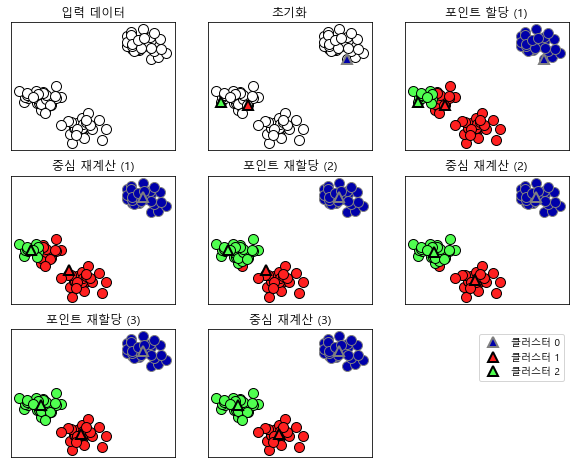

In [6]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

* 고객데이터 몇개의 그룹으로 나눌 것인가 쓰일때 k_mean씀

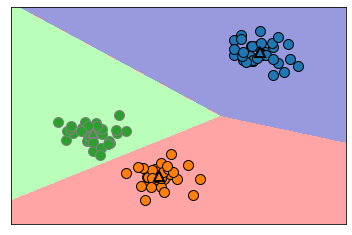

In [7]:
import mglearn
mglearn.plots.plot_kmeans_boundaries()

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적인 2차원 데이터셋
X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3) #0,1,2 세개의 클러스터로 줌
kmeans.fit(X)

print("클러스터 레이블 : \n", kmeans.labels_)

클러스터 레이블 : 
 [1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [12]:
print("클러스터 레이블:\n", kmeans.predict(X))

클러스터 레이블:
 [1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


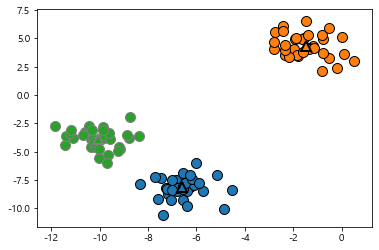

In [19]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1], [0,1,2],
                        markers='^', markeredgewidth=2)
plt.show()

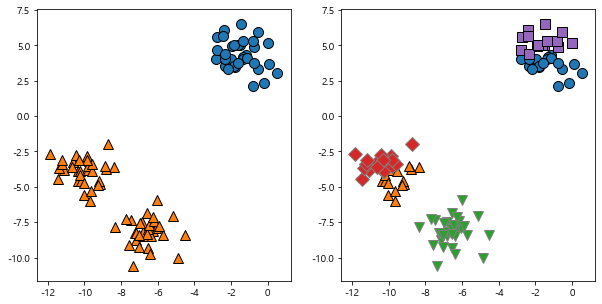

In [23]:
# 클러스터 수 늘리거나 줄이기
fig, axes = plt.subplots(1,2,figsize=(10,5))

# 두개의 클러스터 중심을 사용합니다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

# 다섯개의 클러스터 중심을 사용합니다.
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[1])

#### k-평균 알고리즘 실패하는 경우

Text(0, 0.5, '특성 1')

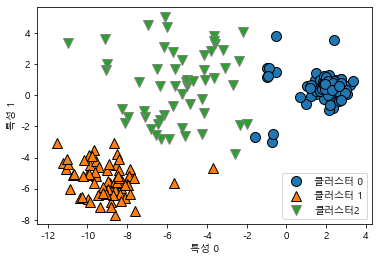

In [27]:
# k-평균 알고리즘이 실패하는 경우 -1

# k-평균 알고리즘은 반경이 똑같다고 가정
X_varied, y_varied = make_blobs(n_samples=200,
                              cluster_std=[1.0, 2.5, 0.5], #방경을 임시로 줌(데이터 분포시켜놓으면 구분 못해)
                              random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(['클러스터 0', '클러스터 1', '클러스터2'], loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0, 0.5, '특성 1')

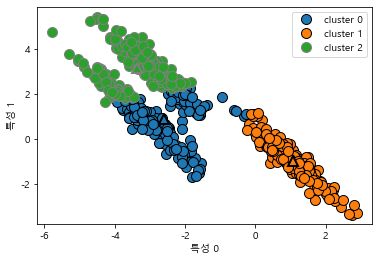

In [31]:
# k-평균 알고리즘 실패 -2

# k-평균은 가장 가까운 클러스터 중심까지의 거리만 고려
# ---> 원형이 아닌 데이터는 잘 구분하지 못한다.
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

#데이터가 길게 늘어지도록 변경한다.
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#클러스터 할당과 클러스터 중심 나타내기
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:, 1], [0,1,2],
                        markers='^', markeredgewidth=2)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

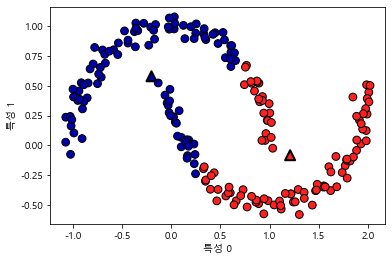

In [33]:
# 복잡한 모양의 클러스터를 구분하지 못한다.
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
y_pred=kmeans.predict(X)

# 클러스터 할당과 클러스터 중심 나타내기
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100,
           linewidth=2, edgecolors='k')

plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

## 3.5.2 병합군집

* ward:기본값 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터 합침
* Average:평균거리 가장 짧은 두 클러스터 합침
* Complete:최대거리 가장 짧은 두 클러스터 합침

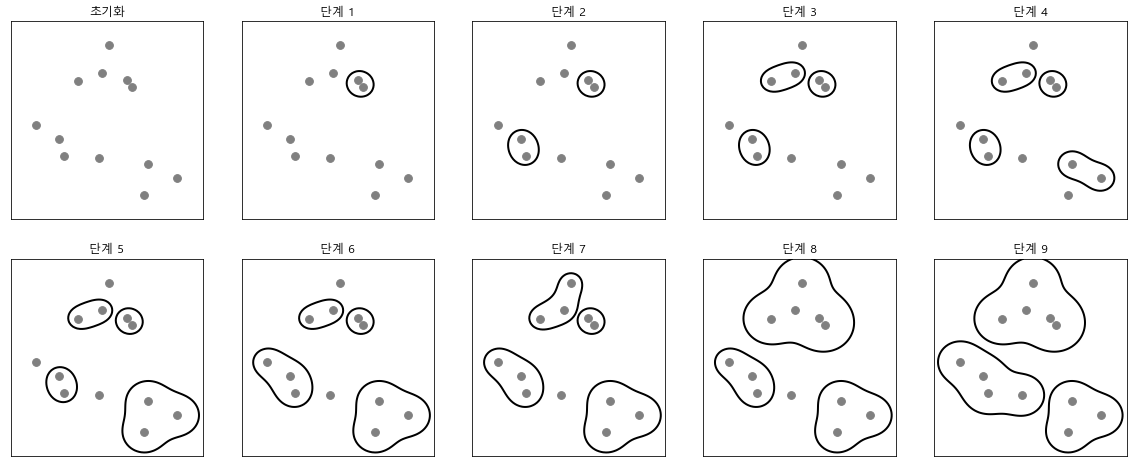

In [35]:
import mglearn
mglearn.plots.plot_agglomerative_algorithm()

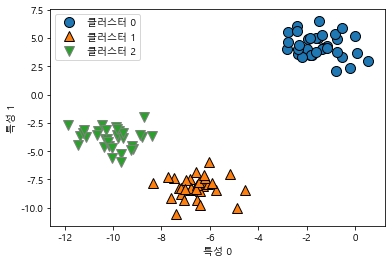

In [49]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import mglearn
import matplotlib.pyplot as plt

#인위적인 2차원 데이터셋
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3) #병합군집은 몇개로 나눠주세요 하고 지정해야함
assignment = agg.fit_predict(X) #새로운 데이터에 대해 예측할수 없다.

#predict 메서드가 없다.
mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

### 계층적 군집과 덴드로그램
* 데이터를 보고 몇개의 그룹으로 나눌수 있을까 참고할수 있는 것이 덴드로그램이다.

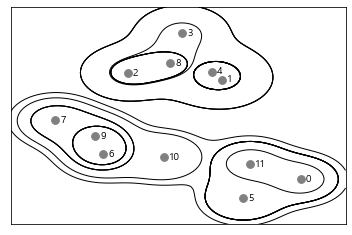

In [43]:
mglearn.plots.plot_agglomerative()

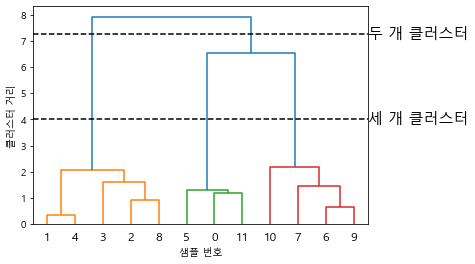

In [55]:
# SciPy에서 ward군집함수와 덴드로그램 함수를 임포트 합니다.
# ward:기본값 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터 합침
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, '두 개 클러스터', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, '세 개 클러스터', va='center', fontdict={'size':15})
plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')
plt.show()

## 3.5.3 DBSCAN

* 클러스터 개수 정할필요 없고, 복잡한 형상도 찾을수 있으며 어떤 클래스에도 속하지 않는 지점 구분 가능 <br>
* 밀집지역을 빈지역경계로 (핵심지점, 경계지점, 잡음지점) 다른 클러스터와 구분
* 특정 공간내에 데이터 밀도 차이를 기반 알고리즘 하고 있어서 복잡한 깋학적인 분포도 가진 데이터 세트에 대해서도 군집화 잘 수행
* 데이터 밀도 차이를 자동 가지하며 생성하므로 사용자가 군집 개수를 지정할수 없다.
* 참고 URL : https://scikit-learn.org/stable/modules/clustering.html

In [52]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


* 작은 샘플 데이터셋에 적합하지 않은 eps와 min_samples기본값 때문이다.
* -1 레이블 : 잡음 포인트를 의미
* eps 거리 안에 잇는 포인트 수가 min_samples보다 적다면 그 포인트는 어떤 클래스에도 속하지 않는 잡음(noise)으로 레이블 된다.

#### 다양한 min_samples, eps 매개변수로 테스트
* Eps를 증가시키면 클러스터에 더 많은 지점 포함
* Min_samples를 증가시키면 핵심 지점수가 줄어들고 잡음 지점이 늘어남

min_samples: 2 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  클러스터: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]


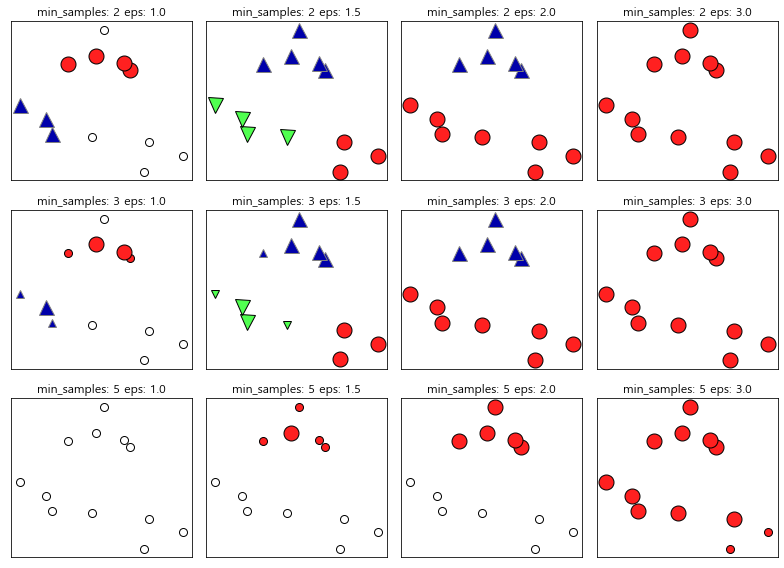

In [58]:
mglearn.plots.plot_dbscan()
#eps(방경)와 샘플의 수를 늘리니 잡음이 늘어난다

* DBSCAN 구성하는 두가지 파라미터<br>
1. eps (입시론 주변 영역) <br>
개별 데이터를 중심(core포인트)으로 입실론 반경을 가지는 원형의 영역<br>
2. 최소데이터개수(min points)<br>
개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수<br><br>

* 데이터 포인트
1. 핵심 포인트 (core point) <br>
방경내에 최소 몇개의 Border포인트를 가지고 있어야 한다.<br>
2. 이웃 포인트<br>
최소 몇개의 border포인트를 가지고 있지 않지만 핵심 포인트 옆에 있다.<br>
3. 잡음 포인트

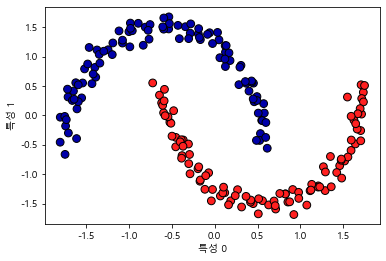

In [61]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

#eps를 기본 값 0.5 -->클러스터를 2개로 만듦
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

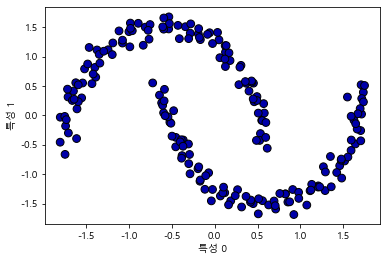

In [64]:
#eps를 기본 값 0.7 -->클러스터를 1개로 만듦
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN(eps=0.7)
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()
# 방경을 0.7로 조금 넓히니 클러스터를 1개로 구분하여 만듦

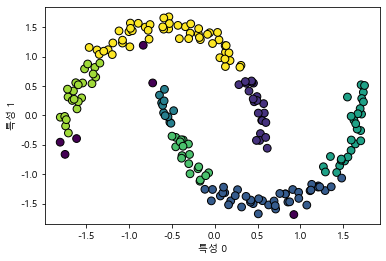

In [66]:
#eps(엡실론:방경)를 0.2로 내리니 8개의 클러스터를 만든다.
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN(eps=0.2)
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='viridis', s=60, edgecolors='black')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

* 방경을 내릴수록 (eps 작을수록) 클러스터가 많아진다.

## 3.5.4 군집 알고리즘의 비교와 평가

* k-평균(가장 가까운것, 다 되면 데이터 중심인 센트로이드 옮겨 군집화)
* 병합(전체 데이터의 분할 게층도를 만들어 주며 덴드로그램을 사용하여 손쉽게 확인)
* DBSCAN (잡음지점 인식 가능, 크기가 많이 다른 클러스터를 만들어낼수 있는 것이 장점이자 단점)